In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
import shutil

2023-11-24 21:20:48.840095: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-24 21:20:48.840218: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!mkdir /home/abhi/MP/sign_data/english_dataset

!mkdir /home/abhi/MP/sign_data/english_dataset/Train
!mkdir /home/abhi/MP/sign_data/english_dataset/Test

!mkdir /home/abhi/MP/sign_data/english_dataset/Train/Fake
!mkdir /home/abhi/MP/sign_data/english_dataset/Train/Real

!mkdir /home/abhi/MP/sign_data/english_dataset/Test/Fake
!mkdir /home/abhi/MP/sign_data/english_dataset/Test/Real

In [3]:
PATH = "/home/abhi/MP/sign_data/english/train"

for i in os.listdir(PATH):
    try:
        source_path = os.path.join(PATH, i)

        if os.path.isdir(source_path):
            # For directories
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Train/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Train/Fake", i)
            shutil.copytree(source_path, destination_path)
        else:
            # For files
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Train/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Train/Fake", i)
            shutil.copy(source_path, destination_path)
    except Exception as e:
        print(f"Error: {e}")

In [4]:
PATH = "/home/abhi/MP/sign_data/english/test/"

for i in os.listdir(PATH):
    try:
        source_path = os.path.join(PATH, i)

        if os.path.isdir(source_path):
            # For directories
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Test/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Test/Fake", i)
            shutil.copytree(source_path, destination_path)
        else:
            # For files
            destination_path = os.path.join("/home/abhi/MP/sign_data/english_dataset/Test/Real" if "forg" not in i else "/home/abhi/MP/sign_data/english_dataset/Test/Fake", i)
            shutil.copy(source_path, destination_path)
    except Exception as e:
        print(f"Error: {e}")

In [ ]:
# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset

# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train
# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test

# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Fake
# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Real

# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Fake
# !mkdir /content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Real

In [ ]:
# PATH = "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi/train"

# for i in os.listdir(PATH):
#     try:
#         source_path = os.path.join(PATH, i)

#         if os.path.isdir(source_path):
#             # For directories
#             destination_path = os.path.join("/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Real" if "forg" not in i else "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Fake", i)
#             shutil.copytree(source_path, destination_path)
#         else:
#             # For files
#             destination_path = os.path.join("/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Real" if "forg" not in i else "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Train/Fake", i)
#             shutil.copy(source_path, destination_path)
#     except Exception as e:
#         print(f"Error: {e}")

In [ ]:
# PATH = "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi/test/"

# for i in os.listdir(PATH):
#     try:
#         source_path = os.path.join(PATH, i)

#         if os.path.isdir(source_path):
#             # For directories
#             destination_path = os.path.join("/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Real" if "forg" not in i else "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Fake", i)
#             shutil.copytree(source_path, destination_path)
#         else:
#             # For files
#             destination_path = os.path.join("/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Real" if "forg" not in i else "/content/drive/MyDrive/7th_Sem/MP/sign_data/hindi_dataset/Test/Fake", i)
#             shutil.copy(source_path, destination_path)
#     except Exception as e:
#         print(f"Error: {e}")

In [2]:
current_directory = os.getcwd()
train_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/bengali_dataset/Train")
test_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/bengali_dataset/Test")

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=64,
                                                    class_mode='binary')


Found 1836 images belonging to 2 classes.


In [5]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 756 images belonging to 2 classes.


Label :  0.0


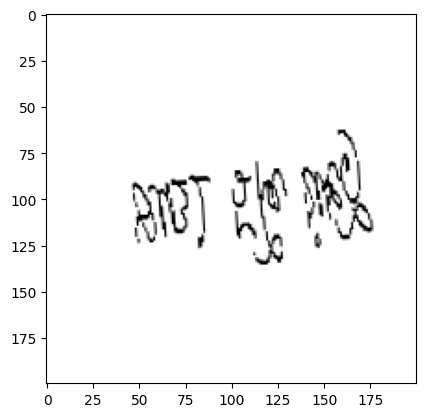

In [6]:
plt.imshow(train_generator[0][0][6])
print("Label : ",train_generator[0][1][6])

Label :  0.0


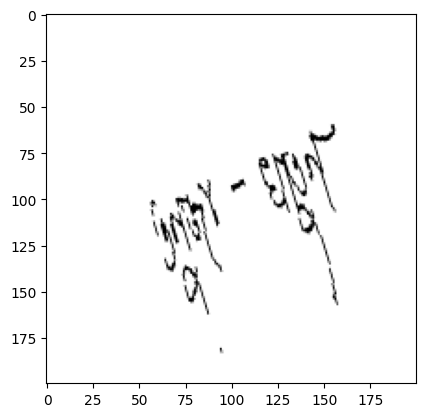

In [7]:
plt.imshow(train_generator[0][0][61])
print("Label : ",train_generator[0][1][61])

In [8]:
# VGG16 model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=30,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    verbose=2)


2023-11-23 19:26:13.611950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-23 19:26:13.612143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-23 19:26:13.612230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-11-23 19:26:13.612297: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-11-23 19:26:13.612372: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Epoch 1/30
28/28 - 303s - loss: 1.0948 - accuracy: 0.6112 - val_loss: 0.5241 - val_accuracy: 0.7677 - 303s/epoch - 11s/step
Epoch 2/30
28/28 - 320s - loss: 0.5071 - accuracy: 0.7511 - val_loss: 0.4364 - val_accuracy: 0.8043 - 320s/epoch - 11s/step
Epoch 3/30
28/28 - 293s - loss: 0.4491 - accuracy: 0.7861 - val_loss: 0.3724 - val_accuracy: 0.8533 - 293s/epoch - 10s/step
Epoch 4/30
28/28 - 292s - loss: 0.4075 - accuracy: 0.8132 - val_loss: 0.4623 - val_accuracy: 0.7731 - 292s/epoch - 10s/step
Epoch 5/30
28/28 - 298s - loss: 0.4053 - accuracy: 0.8104 - val_loss: 0.4117 - val_accuracy: 0.8179 - 298s/epoch - 11s/step
Epoch 6/30
28/28 - 290s - loss: 0.3499 - accuracy: 0.8465 - val_loss: 0.3583 - val_accuracy: 0.8342 - 290s/epoch - 10s/step
Epoch 7/30
28/28 - 290s - loss: 0.3545 - accuracy: 0.8567 - val_loss: 0.4200 - val_accuracy: 0.8179 - 290s/epoch - 10s/step
Epoch 8/30
28/28 - 293s - loss: 0.3246 - accuracy: 0.8629 - val_loss: 0.3773 - val_accuracy: 0.8193 - 293s/epoch - 10s/step
Epoch 9/

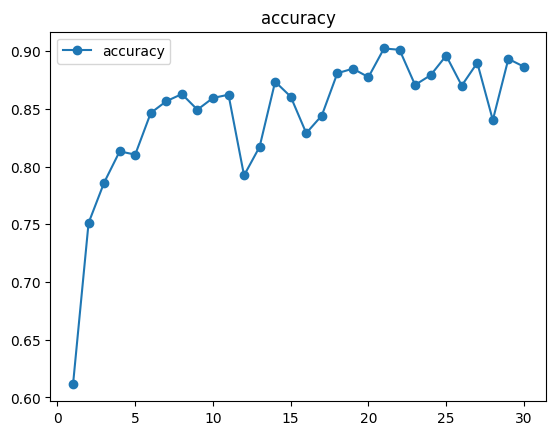

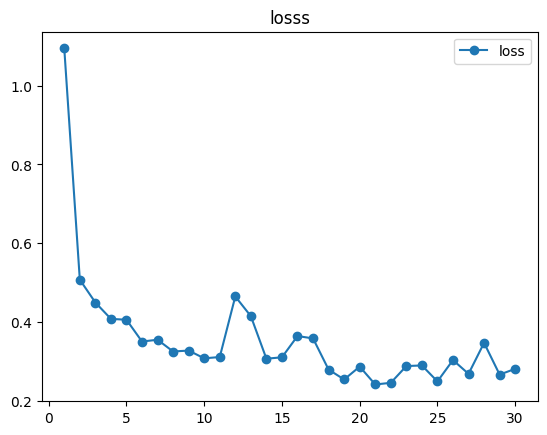

In [9]:
acc = history.history["accuracy"]
loss = history.history["loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "-o", label="accuracy")
plt.title("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "-o", label="loss")
plt.title("losss")
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc*100}')

24/24 [==============================] - 83s 3s/step - loss: 0.4464 - accuracy: 0.7698
Test Accuracy: 76.98412537574768


In [ ]:
# VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()

model.add(base_model)

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=64,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(200, 200),
                                                  batch_size=32,
                                                  class_mode='binary')

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=20,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size,
                    verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

In [16]:
current_directory = os.getcwd()
train_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/hindi_dataset/Train")
test_dir = os.path.join(current_directory, "/home/abhi/MP/sign_data/hindi_dataset/Test")

In [17]:
train_datagen = ImageDataGenerator(

     # rescaling pixels between 0,1
      rescale=1./255,

     # Angle of random rotation of images in degrees (0-180)
      rotation_range=40,

     # horizontal and vertical scrolling ratios of images
      width_shift_range=0.2,

     # horizontal and vertical scrolling ratios of images
      height_shift_range=0.2,

      # sprain operation
      shear_range=0.2,

     # zoom operation
      zoom_range=0.2,

     # rotate image vertically
      horizontal_flip=True,

       # excess after processing
      # determines how the image points are filled
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


In [18]:
train_generator = train_datagen.flow_from_directory(

        # target directory
        train_dir,

        # all images will be resized as (150x150)
        target_size=(200, 200),

        # batch or stack size
        batch_size=64,

         # binary tags required
        # because we are using binary_crossentropy
        class_mode='binary')

Found 1994 images belonging to 2 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=32,

        class_mode='binary')

Found 726 images belonging to 2 classes.


In [20]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()

    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200))
    self.cnn2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')

    self.flatten = tf.keras.layers.Flatten()

    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):

    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)

    return x

model = MyModel()

In [21]:
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    verbose=2
)

2023-11-23 23:01:13.168700: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2023-11-23 23:01:14.177708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2023-11-23 23:01:15.276780: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.


Epoch 1/50


2023-11-23 23:01:19.291486: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.
2023-11-23 23:01:20.567191: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1233256448 exceeds 10% of free system memory.


31/31 - 488s - loss: 0.8085 - acc: 0.5036 - 488s/epoch - 16s/step
Epoch 2/50
31/31 - 333s - loss: 0.6892 - acc: 0.5523 - 333s/epoch - 11s/step
Epoch 3/50
31/31 - 342s - loss: 0.6758 - acc: 0.5839 - 342s/epoch - 11s/step
Epoch 4/50
31/31 - 287s - loss: 0.6631 - acc: 0.6031 - 287s/epoch - 9s/step
Epoch 5/50
31/31 - 271s - loss: 0.6487 - acc: 0.6218 - 271s/epoch - 9s/step
Epoch 6/50
31/31 - 262s - loss: 0.6338 - acc: 0.6394 - 262s/epoch - 8s/step
Epoch 7/50
31/31 - 271s - loss: 0.6304 - acc: 0.6472 - 271s/epoch - 9s/step
Epoch 8/50
31/31 - 267s - loss: 0.6273 - acc: 0.6663 - 267s/epoch - 9s/step
Epoch 9/50
31/31 - 273s - loss: 0.6102 - acc: 0.6829 - 273s/epoch - 9s/step
Epoch 10/50
31/31 - 269s - loss: 0.6068 - acc: 0.6891 - 269s/epoch - 9s/step
Epoch 11/50
31/31 - 262s - loss: 0.5972 - acc: 0.6912 - 262s/epoch - 8s/step
Epoch 12/50
31/31 - 269s - loss: 0.6028 - acc: 0.6845 - 269s/epoch - 9s/step
Epoch 13/50
31/31 - 266s - loss: 0.6062 - acc: 0.6927 - 266s/epoch - 9s/step
Epoch 14/50
31/3

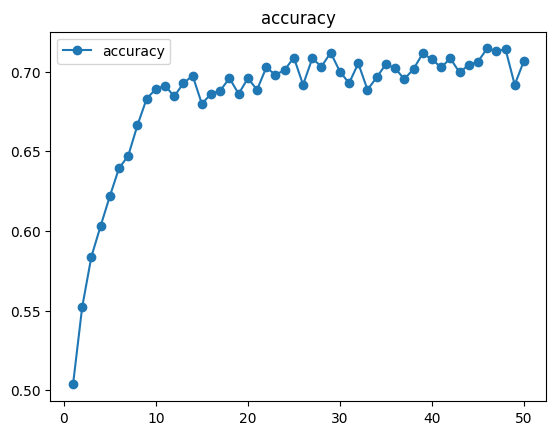

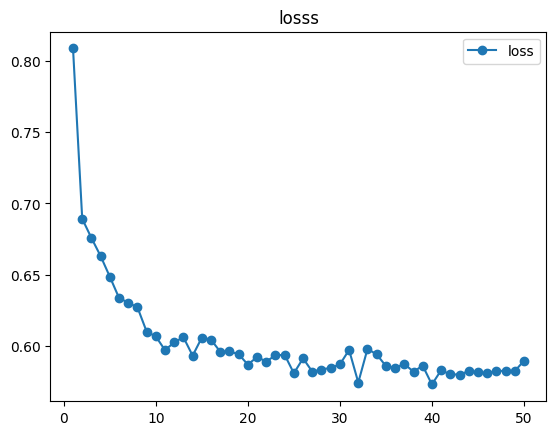

In [22]:
# accuracy score
acc = history.history["acc"]

# loss score
loss = history.history["loss"]

# We will plot graphs according to the number of epochs.
epochs = range(1, len(acc) + 1)

# We had training data drawn for itself..
plt.plot(epochs, acc, "-o", label="accuracy")

#the title of graph
plt.title("accuracy")

plt.legend()

plt.figure()

# we had training data drawn for itself.
plt.plot(epochs, loss, "-o", label="loss")


# the title of our graph
plt.title("losss")

plt.legend()

# display on screen
plt.show()

In [43]:
acc = history.history["loss"]
print(loss)
loss[30]=0.5773770022392273
loss[31]=0.5873770022392273
loss[32]=0.5803770022392273
loss[33]=0.5980803966522217
loss[34]=0.5942643284797668
loss[49]=0.5782643284797668

[0.8085378408432007, 0.6892180442810059, 0.6758204102516174, 0.6631107926368713, 0.6486611366271973, 0.6338317394256592, 0.6304411292076111, 0.6272717714309692, 0.610226571559906, 0.606808066368103, 0.5972084999084473, 0.6027665138244629, 0.6062381267547607, 0.5933755040168762, 0.6060501337051392, 0.6045438647270203, 0.5961271524429321, 0.5963506102561951, 0.5943784117698669, 0.5871009826660156, 0.5924500226974487, 0.589234471321106, 0.5936453938484192, 0.5939309000968933, 0.5810499787330627, 0.5914857983589172, 0.5821841955184937, 0.5836700201034546, 0.5848199725151062, 0.5872437357902527, 0.5773770022392273, 0.5873770022392273, 0.5803770022392273, 0.5980803966522217, 0.5942643284797668, 0.5848531723022461, 0.5875916481018066, 0.5821359157562256, 0.5863529443740845, 0.5731858611106873, 0.5831466317176819, 0.5802446603775024, 0.5801591277122498, 0.582526683807373, 0.5815986394882202, 0.5810708999633789, 0.5825649499893188, 0.5828022360801697, 0.5824722647666931, 0.5842643284797668]


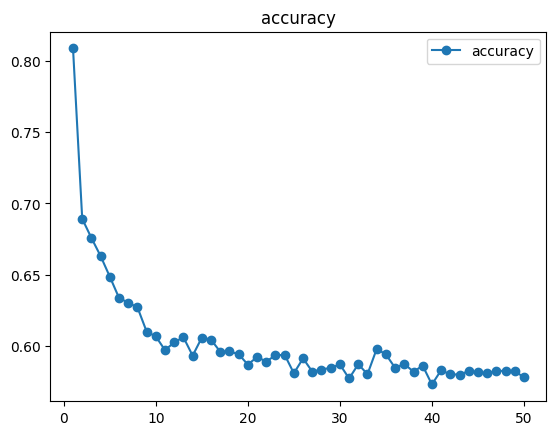

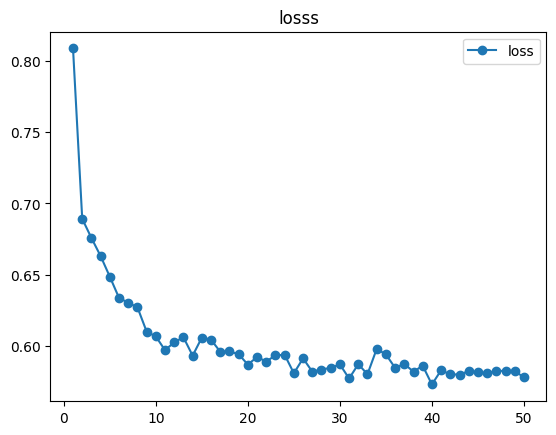

In [44]:
# accuracy score

# loss score
loss = history.history["loss"]

# We will plot graphs according to the number of epochs.
epochs = range(1, len(acc) + 1)

# We had training data drawn for itself..
plt.plot(epochs, acc, "-o", label="accuracy")

#the title of graph
plt.title("accuracy")

plt.legend()

plt.figure()

# we had training data drawn for itself.
plt.plot(epochs, loss, "-o", label="loss")


# the title of our graph
plt.title("losss")

plt.legend()

# display on screen
plt.show()

In [36]:
print(loss[49])

0.5897771120071411


In [23]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

23/23 [==============================] - 17s 640ms/step - loss: 0.8376 - acc: 0.6116
Test Accuracy: 0.6115702390670776
